In [1]:
#%matplotlib inline 
# For inline plotting, commands in cells below the cell that outputs a plot will not affect the plot
import numpy as np # For all mathematical calculations
#import cv2 as cv # For image base transformations
import matplotlib.pyplot as plt #For plotting the output
import tensorflow as tf
from tensorflow.python import keras
#from tensorflow.keras.datasets import cifar10,mnist



In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("x_train: ", x_train.shape)
K = len(np.unique(y_train)) # Classes

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
std=1e-5
w1 = std*np.random.randn(Din, K) 
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

iterations =300
lr =1.4e-2
in_ir=lr
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]
    y_pred=x.dot(w1)+b1
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w1*w1))
    loss_history.append(loss)
    if t%10 ==0:
        print("iteration %d / %d: less %f "%(t,iterations,loss))

    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred)+reg*w1
    db1=dy_pred.sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

print("final loss",loss)


# Forward pass

# Backward pass
# Printing accuracies and displaying w as images

x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
iteration 0 / 300: less 1.000017 
iteration 10 / 300: less 0.876636 
iteration 20 / 300: less 0.842540 
iteration 30 / 300: less 0.823616 
iteration 40 / 300: less 0.812388 
iteration 50 / 300: less 0.805426 
iteration 60 / 300: less 0.800905 
iteration 70 / 300: less 0.797821 
iteration 80 / 300: less 0.795605 
iteration 90 / 300: less 0.793930 
iteration 100 / 300: less 0.792605 
iteration 110 / 300: less 0.791515 
iteration 120 / 300: less 0.790590 
iteration 130 / 300: less 0.789785 
iteration 140 / 300: less 0.789073 
iteration 150 / 300: less 0.788432 
iteration 160 / 300: less 0.787851 
iteration 170 / 300: less 0.787319 
iteration 180 / 300: less 0.786829 
iteration 190 / 300: less 0.786375 
iteration 200 / 300: less 0.785952 
iteration 210 / 300: less 0.785557 
iteration 220 / 300: less 0.785188 
iteration 230 / 300: less 0.784840 
iteration 240 / 300: less 0.784513 
iteration 250 / 300: less 0.784203 
iteration 260 / 300: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

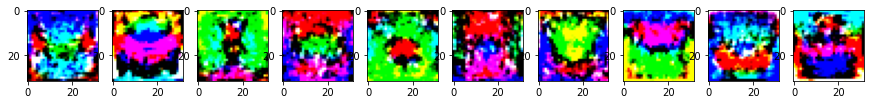

In [3]:
fig,ax=plt.subplots(1,10,figsize=(15,20))

for i in range(10):
    clss=w1[:,i].reshape(32,32,3)
    ax[i].imshow(clss*1000)
plt.show()


In [6]:
print("initial learning rate:",in_ir)


#loss for test data
print("training loss:",loss)

batch_size_test=Nte
indices = np.arange(Nte)
xt=x_test[indices]
yt=y_test[indices]
yt_pred=xt.dot(w1)+b1
loss_t=1./batch_size_test*np.square(yt_pred-yt).sum()+reg*(np.sum(w1*w1))
print("test_data loss:",loss_t)

#accuracies

test_accuracy = 0
train_accuracy = 0
for y_1,y_2 in zip(yt,yt_pred):
    if np.where(y_1 == y_1.max()) == np.where(y_2 == y_2.max()):
        test_accuracy+=1

for y_1,y_2 in zip(y,y_pred):
    if np.where(y_1 == y_1.max()) == np.where(y_2 == y_2.max()):
       train_accuracy+=1

train_accuracy=train_accuracy/Ntr*100
test_accuracy=test_accuracy/Nte*100

print("train accuracy is:",str(train_accuracy)+"%")
print("test accuracy is:",str(test_accuracy)+"%")


initial learning rate: 0.014
training loss: 0.7829011578121524
test_data loss: 0.7876048610667145
train accuracy is: 41.942%
test accuracy is: 40.58%


In [ ]:
x_train_new,x_test_new=x_train*255,x_test*255
H=200
std=1e-6
w1=std*np.random.randn(Din,H)
w2=std*np.random.randn(H,K)
b1=np.zeros(H)
b2=np.zeros(K)
batch_size=Ntr

iterations =300
lr =1.4e-2
in_lr=lr
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train_new[indices]
    y=y_train[indices]
    h=1.0/(1.+np.exe(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))
    loss_history.append(loss)
    if t%10 ==0:
        print("iteration %d / %d: less %f "%(t,iterations,loss))
    
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h))+reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    w2-=lr*dw2
    b2-=lr*db2
    lr*=lr_decay

print("initial learning rate:",in_lr)
print("train loss is:",loss)

#test loss
batch_size_test=Nte
indices = np.arange(Nte)
xt=x_test[indices]
yt=y_test[indices]
h=xt.dot(w1)+b1
yt_pred=h.dot(w2)+b2
loss_t=1./batch_size_test*np.square(yt_pred-yt).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))

print("test_data loss:",loss_t)

    